In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error, make_scorer, r2_score, mean_absolute_error, accuracy_score, precision_recall_curve, auc, roc_auc_score, roc_curve, confusion_matrix, classification_report, f1_score
from scipy.stats import norm, skew

In [2]:
df = pd.read_csv("D:\PICT\TE\Subject_And_Study_Material\SEM_VI\Data_Science_And_Big_Data_Analytics_Lab(DSBDAL)\Datasets\A1_And_A2\StudentsPerformance_modified.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72.0,74.0
1,female,group C,some college,standard,completed,69,90.0,88.0
2,female,group B,master's degree,standard,none,90,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47,57.0,44.0
4,male,group C,some college,standard,none,76,78.0,75.0


In [3]:
df.shape

(1000, 8)

In [4]:
df.dtypes

gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
test preparation course         object
math score                      object
reading score                  float64
writing score                  float64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race/ethnicity               1000 non-null   object 
 2   parental level of education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test preparation course      1000 non-null   object 
 5   math score                   992 non-null    object 
 6   reading score                994 non-null    float64
 7   writing score                991 non-null    float64
dtypes: float64(2), object(6)
memory usage: 62.6+ KB


In [6]:
df.describe()

,reading score,writing score
count,994.000000,991.000000
mean,68.008048,69.487386
std,16.602270,29.563757
min,3.000000,10.000000
25%,58.000000,57.000000
50%,69.500000,69.000000
75%,79.000000,79.000000
max,100.000000,567.000000


In [7]:
df["math score"].unique()

array(['72', '69', '90', '47', '76', '71', '88', '40', '64', '38', '58',
       '65', '78', '50', nan, '74', '73', '67', '70', '62', '63', '56',
       '81', '75', '57', '55', '53', '59', '66', '82', '77', '33', '52',
       '0', '79', '39', '45', '60', '61', '41', '49', '44', '30', '80',
       '42', '27', '43', '68', '85', '98', '87', '54', '51', '99', '84',
       '91', '83', '89', '22', '100', '96', '94', '46', '97', '48', '35',
       '34', '86', '92', '37', '28', '24', '113', '123', '?', '-89', '26',
       '334', '95', '36', '29', '32', '93', '19', '23', '8'], dtype=object)

In [8]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     8
reading score                  6
writing score                  9
dtype: int64

In [9]:
df.replace("?", np.nan, inplace = True)

In [10]:
df["math score"] = df["math score"].astype(float)

In [11]:
mean_value_for_math_score = df["math score"].mean()
df["math score"].fillna(mean_value_for_math_score, inplace=True)

mean_value_for_reading_score = df["reading score"].mean()
df["reading score"].fillna(mean_value_for_reading_score, inplace=True)

mean_value_for_writhing_score = df["writing score"].mean()
df["writing score"].fillna(mean_value_for_writhing_score, inplace=True)

In [12]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [13]:
le = sklearn.preprocessing.LabelEncoder()
df["gender_encoded"] = le.fit_transform(df['gender'])

In [14]:
df.shape

(1000, 9)

In [15]:
df.drop(["gender"], axis = 1, inplace = True)

In [16]:
df.head()

,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,gender_encoded
0,group B,bachelor's degree,standard,none,72.0,72.0,74.0,0
1,group C,some college,standard,completed,69.0,90.0,88.0,0
2,group B,master's degree,standard,none,90.0,95.0,93.0,0
3,group A,associate's degree,free/reduced,none,47.0,57.0,44.0,1
4,group C,some college,standard,none,76.0,78.0,75.0,1


In [17]:
df['race/ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [18]:
df["lunch"].value_counts()

lunch
standard        645
free/reduced    355
Name: count, dtype: int64

Tried OneHotEncoder() but becuase of column names, dropped the idea


In [19]:
ohe = sklearn.preprocessing.OneHotEncoder()
lunch_encoded_2d_array = ohe.fit_transform(df[["lunch"]]).toarray()
lunch_encoded_2d_array.shape

(1000, 2)

In [20]:
lunch_encoded_2d_array
# Lunch categories
# 0 - standard
# 1 - free/reduced


array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]])

In [21]:
df_concatenated = pd.concat([df, pd.DataFrame(lunch_encoded_2d_array, columns=["standard", "free/reduced"])], axis=1)

# Print the shape and contents of the original DataFrame
print("Original DataFrame shape:", df.shape)
print("Original DataFrame:")
print(df)

# Print the shape and contents of the concatenated DataFrame
print("Concatenated DataFrame shape:", df_concatenated.shape)
print("Concatenated DataFrame:")
print(df_concatenated)

Original DataFrame shape: (1000, 8)
Original DataFrame:
    race/ethnicity parental level of education         lunch   
0          group B           bachelor's degree      standard  \
1          group C                some college      standard   
2          group B             master's degree      standard   
3          group A          associate's degree  free/reduced   
4          group C                some college      standard   
..             ...                         ...           ...   
995        group E             master's degree      standard   
996        group C                 high school  free/reduced   
997        group C                 high school  free/reduced   
998        group D                some college      standard   
999        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score   
0                      none        72.0           72.0           74.0  \
1                 completed  

In [22]:
df_concatenated.head()

,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,gender_encoded,standard,free/reduced
0,group B,bachelor's degree,standard,none,72.0,72.0,74.0,0,0.0,1.0
1,group C,some college,standard,completed,69.0,90.0,88.0,0,0.0,1.0
2,group B,master's degree,standard,none,90.0,95.0,93.0,0,0.0,1.0
3,group A,associate's degree,free/reduced,none,47.0,57.0,44.0,1,1.0,0.0
4,group C,some college,standard,none,76.0,78.0,75.0,1,0.0,1.0


In [23]:
df_concatenated.drop(["lunch", "free/reduced"], axis = 1, inplace = True)

In [24]:
df_concatenated.shape

(1000, 8)

In [25]:
df_concatenated.dtypes

race/ethnicity                  object
parental level of education     object
test preparation course         object
math score                     float64
reading score                  float64
writing score                  float64
gender_encoded                   int32
standard                       float64
dtype: object

In [26]:
df_concatenated["gender_encoded"] = df_concatenated["gender_encoded"].astype("float")
df.dtypes

race/ethnicity                  object
parental level of education     object
lunch                           object
test preparation course         object
math score                     float64
reading score                  float64
writing score                  float64
gender_encoded                   int32
dtype: object

In [27]:
cols = ["math score", "reading score", "writing score"]
for col in cols:
  print("Skewness of {} : ".format(col), df[col].skew())

Skewness of math score :  2.570933246803145
Skewness of reading score :  -0.8169514901112902
Skewness of writing score :  11.501999723973539


Assignment 2

C:\Users\Vivek Gotecha\AppData\Local\Temp\ipykernel_14644\2937582184.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_concatenated[col], fit=norm)


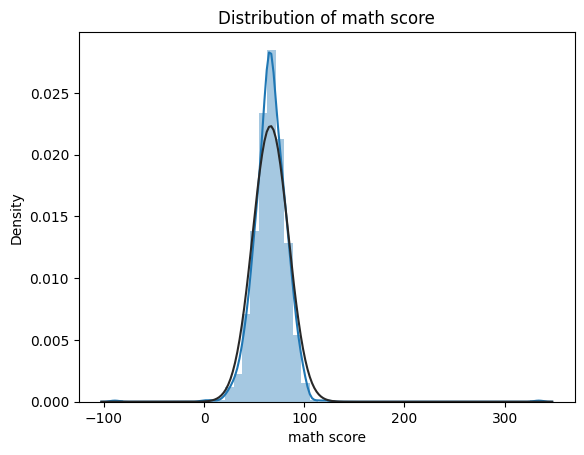

C:\Users\Vivek Gotecha\AppData\Local\Temp\ipykernel_14644\2937582184.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_concatenated[col], fit=norm)


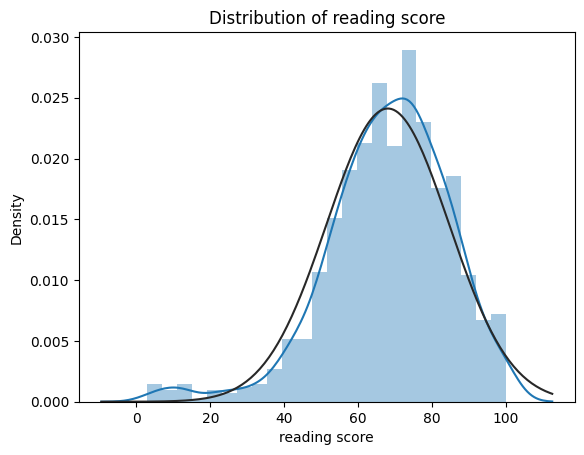

C:\Users\Vivek Gotecha\AppData\Local\Temp\ipykernel_14644\2937582184.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_concatenated[col], fit=norm)


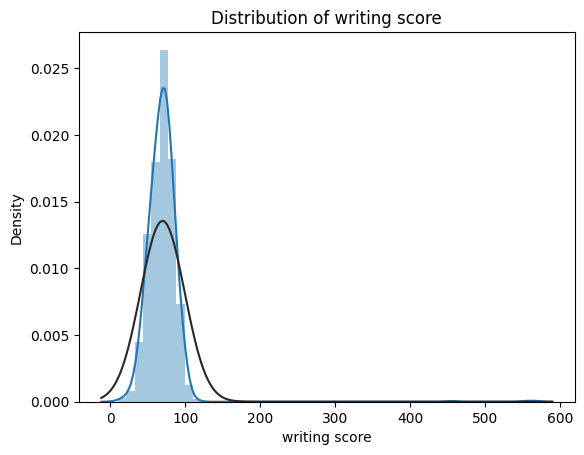

In [28]:
cols = ["math score", "reading score", "writing score"]

for col in cols:
  sns.distplot(df_concatenated[col], fit=norm)
  plt.title("Distribution of " + col)
  plt.show()

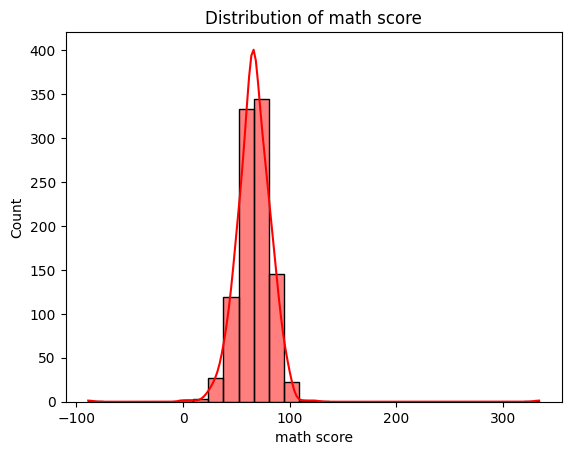

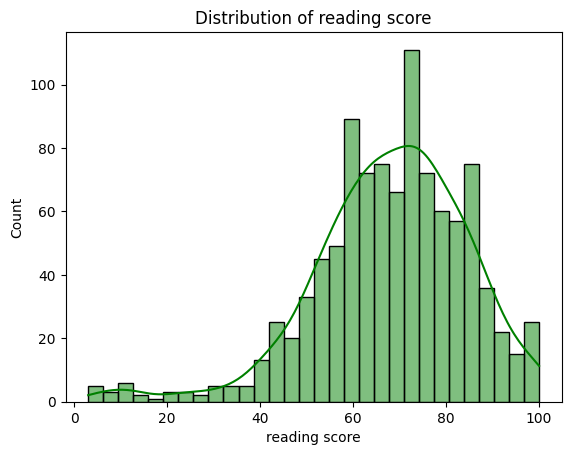

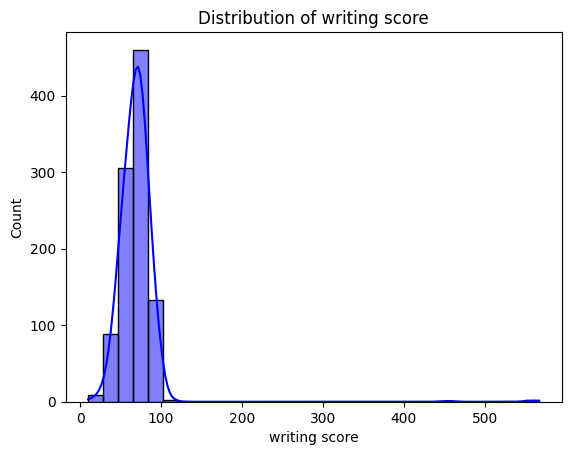

In [29]:
cols = ["math score", "reading score", "writing score"]
colors = ["red", "green", "blue"]

for col, color in zip(cols, colors):
  sns.histplot(df_concatenated[col], kde=True, bins=30, color=color)
  plt.title("Distribution of " + col)
  plt.show()

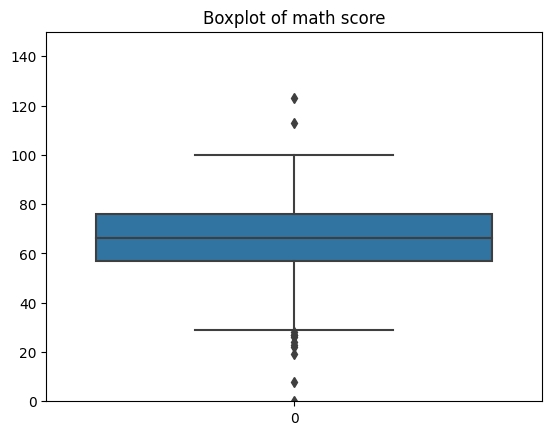

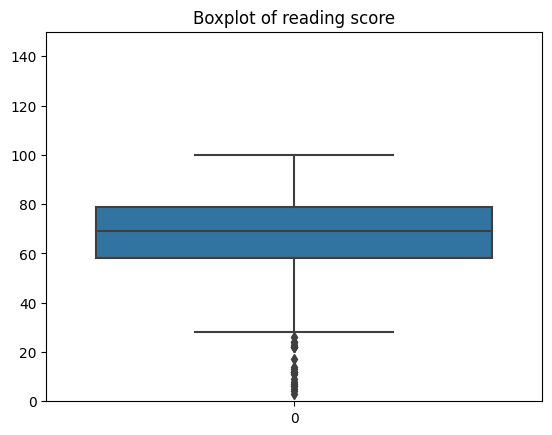

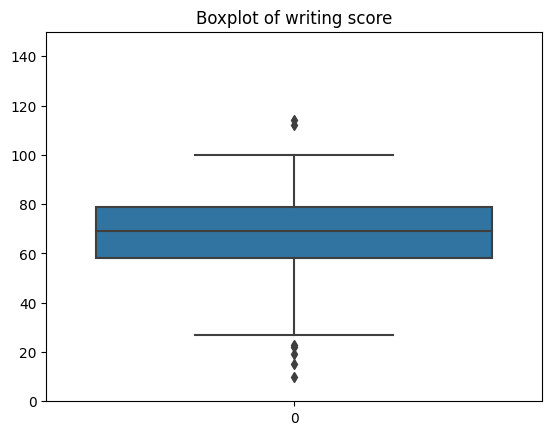

In [30]:
# For outliers
cols = ["math score", "reading score", "writing score"]

for col in cols:
  sns.boxplot(df_concatenated[col])
  plt.title("Boxplot of " + col)
  plt.ylim(0, 150)
  plt.show()

In [31]:
# Remove Outliers using IQR
cols = ["math score", "reading score", "writing score"]

for col in cols:
  Q1 = df_concatenated[col].quantile(0.25)
  Q3 = df_concatenated[col].quantile(0.75)
  iqr = Q3 - Q1
  lower_bound = Q1 - 1.5 * iqr
  upper_bound = Q3 + 1.5 * iqr
  df_concatenated = df_concatenated[(df_concatenated[col] >= lower_bound) & (df_concatenated[col] <= upper_bound)]

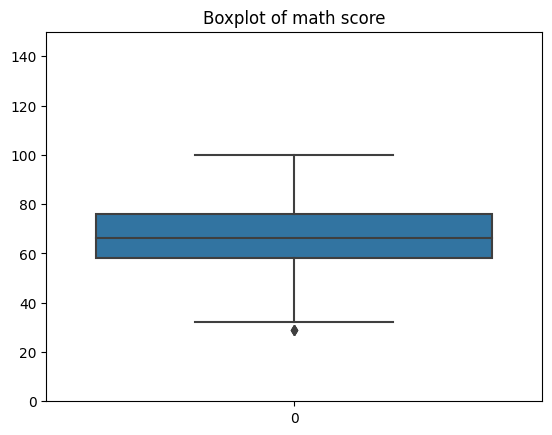

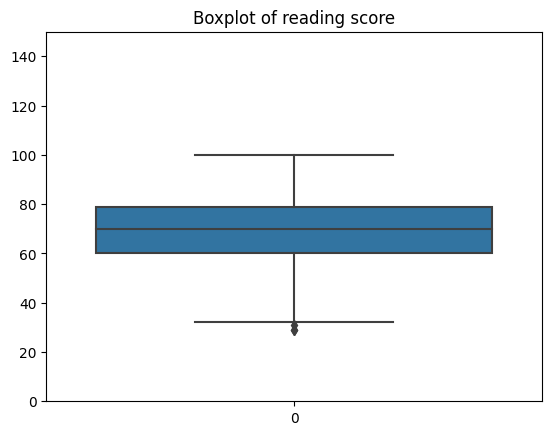

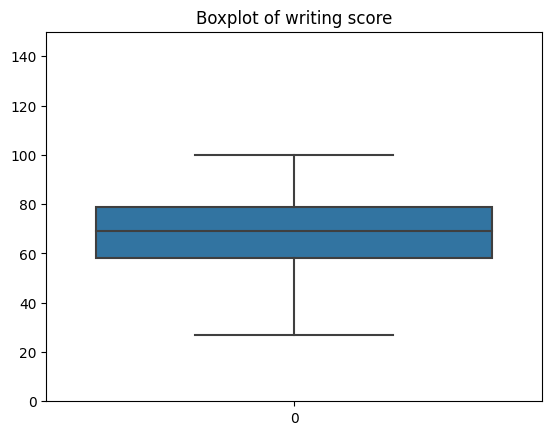

In [32]:
# For outliers
cols = ["math score", "reading score", "writing score"]

for col in cols:
  sns.boxplot(df_concatenated[col])
  plt.title("Boxplot of " + col)
  plt.ylim(0, 150)
  plt.show()

In [33]:
cols = ["math score", "reading score", "writing score"]
for col in cols:
  print("Skewness of {} : ".format(col), df[col].skew())

Skewness of math score :  2.570933246803145
Skewness of reading score :  -0.8169514901112902
Skewness of writing score :  11.501999723973539


In [34]:
new_df = df_concatenated[["math score", "reading score", "writing score"]]
new_df.head()

,math score,reading score,writing score
0,72.0,72.0,74.0
1,69.0,90.0,88.0
2,90.0,95.0,93.0
3,47.0,57.0,44.0
4,76.0,78.0,75.0


In [35]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

new_df_scaled = sc.fit_transform(new_df)

new_df_scaled = pd.DataFrame(new_df_scaled, columns=["math score", "reading score", "writing score"])
print("Old dataframe description : ")
print(df_concatenated.describe().transpose())

print("New dataframe description : ")
print(new_df_scaled.describe().transpose())

Old dataframe description : 
                count       mean        std   min   25%        50%   75%   
math score      959.0  66.644068  14.110138  29.0  58.0  66.323929  76.0  \
reading score   959.0  69.532897  14.022967  29.0  60.0  70.000000  79.0   
writing score   959.0  68.537447  14.482207  27.0  58.0  69.000000  79.0   
gender_encoded  959.0   0.484880   0.500032   0.0   0.0   0.000000   1.0   
standard        959.0   0.351408   0.477659   0.0   0.0   0.000000   1.0   

                  max  
math score      100.0  
reading score   100.0  
writing score   100.0  
gender_encoded    1.0  
standard          1.0  
New dataframe description : 
               count          mean       std       min       25%       50%   
math score     959.0 -4.630753e-18  1.000522 -2.669266 -0.612934 -0.022700  \
reading score  959.0  4.427000e-16  1.000522 -2.891973 -0.680161  0.033327   
writing score  959.0 -2.593222e-16  1.000522 -2.869668 -0.727993  0.031956   

                    75%     